#### HW4 
###### Name: Christopher Morris
###### Date: 06/14/19


### 1) Compute the motion of a particle using the jerk term

Discussion: 

A particle under a given acceleration was modeled for 0 < t < 10. The position of the particle was updated by using an analytic-jerk integration scheme. Afterwards, the energy error was calculated for dt with dt .5 < t < 1e-3 by intervals of 2. The log10 of dt list was plotted as log10 of the energy error list, and the slope of the resulting graph returns the order of the integration scheme.

The only main issue with this section is determining which slope to use from the graph to determine the order.

In [1]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

# Particle Acceleration
def acc(x, v):
    return -4 * math.sin(x)**3

def jerk(x,v):
    return -12 * math.sin(x)**2 * math.cos(x)*v

# Potential - calculated from acceleration
def potential(x):
    return -4*math.cos(x) + (4*math.cos(x)**3 + 8)/3

# Total Energy
def energy(x, v):
    Etot = potential(x) + 0.5*v*v
    return Etot

def output(x, v, t):
#     Print numerical and analytical solutions and the energy error
#     to cout.
    #print ('{:5.3f} {:5.3f} {:5.3f} {:5.3f}'.format(t, x, analytic_soln(t)[0], energy(x, v) - E0))
    pass

def take_a_step(x, v, t, dt): #analytic-jerk function
    
    # Set the acceleration and jerk
    a =  acc(x, v)
    j = jerk(x, v)
    
    xp = x
    x += v*dt + .5*a*dt*dt
    v += a*dt + .5*j*dt*dt
    
    # Take the time step.
    
    t += dt
    return xp, x, v, t

        
# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
energy_list = []
dt_list = []
DT = .5

while not DT < 1e-3:
    dt_list.append(DT)
    X0 = 0
    V0 = 1
    K  = 4
    
    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = 10

    
    # initial energy
    E0 = energy(x, v)
    dEmax = 0
    while t <= tmax:

        (xp, x, v, t) = take_a_step(x, v, t, dt)

        #Compute the maximum error.
        dE = energy(x, v) - E0
        if abs(dE) > dEmax: 
            dEmax = abs(dE)
            
    energy_list.append(dEmax)
    print('The energy error for dt = {} is {}'.format(DT, dEmax))
    
    DT /= 2
    

plt.plot(np.log10(dt_list), np.log10(energy_list), 'g-o')
plt.xlabel('log10 dt')
plt.ylabel('log10 x')
plt.title('1) log10 t vs log10 x')
print('The slope: {}'.format((np.log10(energy_list)[-3] - np.log10(energy_list)[-2]) / 
                         (np.log10(dt_list)[-3] - np.log10(dt_list)[-2])))

The energy error for dt = 0.5 is 20.885116234855058
The energy error for dt = 0.25 is 0.22244905648197633
The energy error for dt = 0.125 is 0.02594523550001837
The energy error for dt = 0.0625 is 0.004371665000110214
The energy error for dt = 0.03125 is 0.0008431568289937186
The energy error for dt = 0.015625 is 0.00018019763168775071
The energy error for dt = 0.0078125 is 4.127218968208446e-05
The energy error for dt = 0.00390625 is 9.8503690131313e-06
The energy error for dt = 0.001953125 is 2.4046079601935944e-06
The slope: 2.0669203053419514


#### The order for 1) on the longer, less steep section was found to be 2 which is from the rounded slope of the section.

### 2) Compute the motion of a particle using the predictor-corrector scheme

Discussion: 

A particle under a given acceleration was modeled for 0 < t < 10 the same was done as in problem 1, but instead of an analytic-jerk integration scheme, a predictor-corrector scheme was used.

The issue has in problem 1 was not had for this problem because the graph had a straight line.

The max energy error for dt = 0.5 is 0.05111005163856075
The max energy error for dt = 0.25 is 0.011777142824123232
The max energy error for dt = 0.125 is 0.0028724401018309087
The max energy error for dt = 0.0625 is 0.0007137952867196651
The max energy error for dt = 0.03125 is 0.0001781723129254953
The max energy error for dt = 0.015625 is 4.452738229787645e-05
The max energy error for dt = 0.0078125 is 1.1130888341537304e-05
The max energy error for dt = 0.00390625 is 2.782656469468847e-06
The max energy error for dt = 0.001953125 is 6.956604972074842e-07
The slope: 2.000034018802113


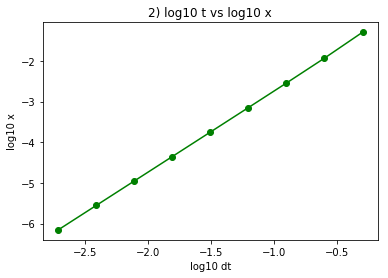

In [2]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================
def take_a_step(x, v, t, dt): #Predictor-corrector function
    
    # Set the acceleration.
    xp = x
    # Set the acceleration.
    a = acc(x, v)
    x += v*dt + .5*a*dt*dt
    vp = v + a*dt
    
    a_pred = acc(x, v)
    v = vp + .5 * (a_pred - a)*dt
    
    # Take the time step.
    
    t += dt
    return xp, x, v, t


# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
energy_list = []
dt_list = []
DT = .5
while DT >= 1e-3:
    dt_list.append(DT)
    X0 = 0
    V0 = 1
    K  = 4
    
    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = 10

    # initial energy
    E0 = energy(x, v)
    dEmax = 0
    while t <= tmax:

        (xp, x, v, t) = take_a_step(x, v, t, dt)

        #Compute the maximum error.
        dE = energy(x, v) - E0
        if abs(dE) > dEmax: 
            dEmax = abs(dE)
            
    energy_list.append(dEmax)
    print('The max energy error for dt = {} is {}'.format(DT, dEmax))
    
    DT /= 2
    

plt.plot(np.log10(dt_list), np.log10(energy_list), 'g-o')
plt.xlabel('log10 dt')
plt.ylabel('log10 x')
plt.title('2) log10 t vs log10 x')
print('The slope: {}'.format((np.log10(energy_list)[-3] - np.log10(energy_list)[-2]) / 
                         (np.log10(dt_list)[-3] - np.log10(dt_list)[-2])))

#### The order for 2) was found to be 2 which is from the rounded slope

### Question 3)

General Equation:

$$ a_{i} = acc(x_{i})$$
$$ x_{i+1} = x_{i} + v_{i}\delta t + \frac{1}{2}a_{i}\delta t^{2}$$
$$ v_{p} = v_{i} + a_{i}\delta t $$
$$ a_{p} = acc(x_{i+1})  $$
$$ v_{i+1} = v_{p} + \frac{1}{2}(a_{p} - a_{i})\delta t $$
$$ t_{i+1} = t_{i} + \delta t $$

For i = 0 and delta t > 0:

$$ a_{0} = acc(x_{0})$$
$$ x_{1} = x_{0} + v_{0}\delta t + \frac{1}{2}a_{0}\delta t^{2}$$
$$ v_{p} = v_{0} + a_{0}\delta t $$
$$ a_{p} = acc(x_{1}) $$
$$ v_{1} = v_{p} + \frac{1}{2}(a_{p} - a_{0})\delta t $$
$$ v_{1} = v_{0} + \frac{1}{2}a_{0}\delta t + \frac{1}{2}a_{1}\delta t $$
$$ t_{1} = t_{0} + \delta t $$


For i = 1 and delta t < 0:

$$ a_{1} = acc(x_{1})$$
$$ x_{2} = x_{1} - v_{1}\delta t + \frac{1}{2}a_{1}\delta t^{2}$$

$$ x_{2} = x_{0} + v_{0}\delta t + \frac{1}{2}a_{0}\delta t^{2} - (v_{p} + \frac{1}{2}(a_{p} - a_{0})\delta t)\delta t + \frac{1}{2}a_{1}\delta t^{2}$$


$$ x_{2} = x_{0} + v_{0}\delta t + \frac{1}{2}a_{0}\delta t^{2} - (v_{0} + a_{0}\delta t + \frac{1}{2}(a_{1} - a_{0})\delta t)\delta t + \frac{1}{2}a_{1}\delta t^{2}$$

$$ x_{2} = x_{0} + v_{0}\delta t - v_{0}\delta t + \frac{1}{2}a_{0}\delta t^{2} + \frac{1}{2}a_{0}\delta t^{2} - a_{0}\delta t^{2} + \frac{1}{2}a_{1}\delta t^{2} - \frac{1}{2}a_{1}\delta t^{2} $$

$$ x_{2} = x_{0} $$

$$ v_{p} = v_{1} - a_{1}\delta t $$
$$ a_{p} = acc(x_{2}) = acc(x_{0}) = a_{0} $$
$$ v_{2} = v_{p} - \frac{1}{2}(a_{0} - a_{0})\delta t $$

$$ v_{2} = v_{1} - a_{1}\delta t + \frac{1}{2}a_{1}\delta t - \frac{1}{2}a_{0}\delta t $$
$$ v_{2} = v_{0} + \frac{1}{2}a_{0}\delta t + \frac{1}{2}a_{1}\delta t $$

$$ v_{1} = v_{0} + \frac{1}{2}a_{0}\delta t - \frac{1}{2}a_{0}\delta t + \frac{1}{2}a_{1}\delta t - \frac{1}{2}a_{1}\delta t $$

$$ v_{2} = v_{0}  \text{       in the negative delta t direction} $$

$$ t_{2} = t_{1} - \delta t $$

$$ t_{2} = t_{0} + \delta t - \delta t $$
$$ t_{2} = t_{0} $$


Discussion: 

The first code shows that the predictor-corrector integration scheme is reversible because the final x value in the reverse direction from 10 > t > 0 is the same as the original x value.

The second code shows the opposite of the first code, the analytic-jerk integration scheme is not time reversible because the final x value in the reverse direction is not the same as the original x value.


In [3]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

def take_a_step(x, v, t, dt, forward): #analytic-jerk function
    
    if forward: #boolean value that determines if going forward (True) or backwards (False) in time.
        dt = dt
    else:
        dt = -dt
        
    a = acc(x, v)
    x += v*dt + .5*a*dt*dt
    vp = v + a*dt

    a_pred = acc(x, v)
    v = vp + .5 * (a_pred - a)*dt


    t += dt
        
    return x, v, t

        
# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
DT = .0625
X0 = 0
V0 = 1
K  = 4

# Initialize the system.

t    = 0
x    = X0
xp   = x
v    = V0
dt   = DT
tmax = 10

# Initialize Plotting Lists

t_forward = []
x_forward = []
t_backward = []
x_backward = []

# Going forwards
while t <= tmax:
    t_forward.append(t)
    x_forward.append(x)
    (x, v, t) = take_a_step(x, v, t, dt, True)

# Going backwards
while t > 0:
    (x, v, t) = take_a_step(x, v, t, dt, False)
    t_backward.append(t)
    x_backward.append(x)

print('3b) Numerical Calculations for Predictor-Corrector\n')
print('Foward Calculation')
for i, t in enumerate(t_forward):
    print('x = {:.5f}, t = {:.5f}'.format(x_forward[i], t))
    
print('\nBackwards Calculation')
for i, t in enumerate(t_backward):
    print('x = {:.5f}, t = {:.5f}'.format(x_backward[i], t))
    
print('The final value of x calculated in the reverse direction, x = {:.5f} which is equal to x0 = {}'.format(x_backward[-1], X0))



3b) Numerical Calculations for Predictor-Corrector

Foward Calculation
x = 0.00000, t = 0.00000
x = 0.06250, t = 0.06250
x = 0.12500, t = 0.12500
x = 0.18746, t = 0.18750
x = 0.24983, t = 0.25000
x = 0.31196, t = 0.31250
x = 0.37363, t = 0.37500
x = 0.43455, t = 0.43750
x = 0.49430, t = 0.50000
x = 0.55238, t = 0.56250
x = 0.60821, t = 0.62500
x = 0.66112, t = 0.68750
x = 0.71041, t = 0.75000
x = 0.75537, t = 0.81250
x = 0.79530, t = 0.87500
x = 0.82953, t = 0.93750
x = 0.85750, t = 1.00000
x = 0.87871, t = 1.06250
x = 0.89279, t = 1.12500
x = 0.89948, t = 1.18750
x = 0.89868, t = 1.25000
x = 0.89039, t = 1.31250
x = 0.87476, t = 1.37500
x = 0.85207, t = 1.43750
x = 0.82272, t = 1.50000
x = 0.78721, t = 1.56250
x = 0.74615, t = 1.62500
x = 0.70020, t = 1.68750
x = 0.65007, t = 1.75000
x = 0.59648, t = 1.81250
x = 0.54012, t = 1.87500
x = 0.48163, t = 1.93750
x = 0.42159, t = 2.00000
x = 0.36048, t = 2.06250
x = 0.29869, t = 2.12500
x = 0.23649, t = 2.18750
x = 0.17410, t = 2.25000
x = 

In [4]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np


def take_a_step(x, v, t, dt, forward):
    
    if forward: #boolean value that determines if going forward (True) or backwards (False) in time.
        dt = dt
    else:
        dt = -dt
        # Set the acceleration.
    a =  acc(x, v)
    j = jerk(x, v)

    x += v*dt + .5*a*dt*dt
    v += a*dt + .5*j*dt*dt

        # Take the time step.

    t += dt
        
    return x, v, t


# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
DT = .0625
X0 = 0
V0 = 1
K  = 4

# Initialize the system.

t    = 0
x    = X0
xp   = x
v    = V0
dt   = DT
tmax = 10


# Initialize Plotting Lists

t_forward = []
x_forward = []
t_backward = []
x_backward = []

#Going forwards
while t <= tmax:
    t_forward.append(t)
    x_forward.append(x)
    (x, v, t) = take_a_step(x, v, t, dt, True)
    
# Going backwards
while t > 0:
    (x, v, t) = take_a_step(x, v, t, dt, False)
    t_backward.append(t)
    x_backward.append(x)

print('3c) Numerical Calculations for Analytic-Jerk\n')
print('Foward Calculation')
for i, t in enumerate(t_forward):
    print('x = {:.5f}, t = {:.5f}'.format(x_forward[i], t))
    
print('\nBackwards Calculation')
for i, t in enumerate(t_backward):
    print('x = {:.5f}, t = {:.5f}'.format(x_backward[i], t))
    
print('The final value of x calculated in the reverse direction, x = {:.5f} which is no equal to x0 = {}'.format(x_backward[-1], X0))




3c) Numerical Calculations for Analytic-Jerk

Foward Calculation
x = 0.00000, t = 0.00000
x = 0.06250, t = 0.06250
x = 0.12500, t = 0.12500
x = 0.18747, t = 0.18750
x = 0.24986, t = 0.25000
x = 0.31203, t = 0.31250
x = 0.37377, t = 0.37500
x = 0.43477, t = 0.43750
x = 0.49463, t = 0.50000
x = 0.55284, t = 0.56250
x = 0.60881, t = 0.62500
x = 0.66187, t = 0.68750
x = 0.71132, t = 0.75000
x = 0.75642, t = 0.81250
x = 0.79646, t = 0.87500
x = 0.83078, t = 0.93750
x = 0.85879, t = 1.00000
x = 0.88000, t = 1.06250
x = 0.89402, t = 1.12500
x = 0.90061, t = 1.18750
x = 0.89964, t = 1.25000
x = 0.89114, t = 1.31250
x = 0.87525, t = 1.37500
x = 0.85226, t = 1.43750
x = 0.82257, t = 1.50000
x = 0.78671, t = 1.56250
x = 0.74528, t = 1.62500
x = 0.69896, t = 1.68750
x = 0.64847, t = 1.75000
x = 0.59454, t = 1.81250
x = 0.53786, t = 1.87500
x = 0.47911, t = 1.93750
x = 0.41884, t = 2.00000
x = 0.35754, t = 2.06250
x = 0.29560, t = 2.12500
x = 0.23329, t = 2.18750
x = 0.17082, t = 2.25000
x = 0.1082